In [188]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [189]:
#https://strathprints.strath.ac.uk/67084/1/Koukoura_etal_2018_An_insight_into_wind_turbine_planet_bearing.pdf

In [190]:
df=pd.read_excel("rK3g26ERseWlQI7rj1yw_Table_1.xlsx")

In [191]:
#print(df.head(10))

In [192]:
df_time = pd.to_datetime(df["Time_stamp"])
df_time_s=(df_time.dt.hour*60+df_time.dt.minute)*60 + df_time.dt.second

In [193]:
max_value = df['Pow'].max()
print("max_value Pow: "+str(max_value))
min_value = df['Pow'].min()
print("min_value Pow: "+str(min_value))

max_value Pow: 2302.7080078125
min_value Pow: -42.6514282226563


In [194]:
df.insert(6, "Time_s", df_time_s, True)

In [200]:
#calculate normalized power, which statistic?

In [195]:
df.insert(7, "NPow", (df.Pow-min_value)/(max_value-min_value), True)

In [196]:
df.insert(8, "NPow(%)", 100*df.NPow, True)

In [197]:
max_value = df['NPow(%)'].max()
print("max_value NPow(%): "+str(max_value))
min_value = df['NPow(%)'].min()
print("min_value NPow(%): "+str(min_value))

max_value NPow(%): 100.0
min_value NPow(%): 0.0


In [198]:
#Data points where maximum wind speed has reached more than 25 m/s are also filtered out
max_value = df['Ws'].max()
print("max_value Ws: "+str(max_value))
min_value = df['Ws'].min()
print("min_value Ws: "+str(min_value))

max_value Ws: 23.1718807220459
min_value Ws: 0.0


In [199]:
#https://medium.com/critical-powers/formulas-from-training-and-racing-with-a-power-meter-2a295c661b46#:~:text=Normalized%20Power,-Normalized%20Power%20(NP&text=Step%201%3A%20Calculate%20the%20rolling,values%20from%20the%20previous%20step.

In [201]:
#print(df.head(10))
print("Number of rows in df: "+str(len(df.index)))

Number of rows in df: 4464


In [202]:
#before pre-processing Red

In [203]:
#data pre-processing

In [204]:
print(df.columns)
print(df.describe())

Index(['Time_stamp', 'date_num', 'Ws', 'Pow', 'Temp', 'Pressure', 'Time_s',
       'NPow', 'NPow(%)'],
      dtype='object')
            date_num           Ws          Pow         Temp     Pressure  \
count    4464.000000  4460.000000  4460.000000  4406.000000  4406.000000   
mean   734884.496528     6.814093   699.289243     3.377414   981.915683   
std         8.949931     3.573914   744.811356     2.419593    12.942475   
min    734869.000000     0.000000   -42.651428    -2.180700   934.159973   
25%    734876.748264     4.166160    80.860479     1.510470   973.849762   
50%    734884.496528     6.225677   335.774612     3.189075   984.079498   
75%    734892.244792     9.325553  1285.598236     5.094607   992.327026   
max    734899.993056    23.171881  2302.708008     9.993120  1001.919983   

             Time_s         NPow      NPow(%)  
count   4464.000000  4460.000000  4460.000000  
mean   42900.000000     0.316344    31.634412  
std    24943.724248     0.317568    31.756811 

In [205]:
for val in df.columns:
    #print(df[val].isnull().sum())
    if df[val].isnull().sum()!=0:
        print("Column name: "+val+" ,number of NaN values: "+str(df[val].isnull().sum()))
        #print(df[df[val].isnull()])
            
        

Column name: Ws ,number of NaN values: 4
Column name: Pow ,number of NaN values: 4
Column name: Temp ,number of NaN values: 58
Column name: Pressure ,number of NaN values: 58
Column name: NPow ,number of NaN values: 4
Column name: NPow(%) ,number of NaN values: 4


In [206]:
#Firstly, samples with missing values or no power production are filtered out
df1=df.dropna()

In [207]:
print("Number of rows in df1: "+str(len(df1.index)))

Number of rows in df1: 4402


In [208]:
#a lower limit of output power is set at 0 kW for data sample selection.
df2= df1[df1['Pow'] >= 10]  
print("Number of rows in df2: "+str(len(df2.index)))
min_value = df2['Pow'].min()
print("min_value Pow in df2 "+str(min_value))

Number of rows in df2: 3898
min_value Pow in df2 10.1383304595947


In [209]:

# model normal behaviour so curtailment should not be considered


#cluster filter is applied on the training data and aims to remove outliers depending on the operating conditions of the wind turbine.
#A multivariate outlier detection approach based on Mahalanobis distance is used in 
#This paper utilizes agglomerative hierarchical clustering (Rokach & Maimon, 2005)
#the distance between every pair of objects in a data set is computed
#used in the linkage function which determines how the objects in the data set should be grouped into clusters that form a binary hierarchical cluster tree.
#The distance in this paper is calculated in the Euclidean space and the inner squared distance is computed using Ward’s algorithm
#A probability threshold of 2.5% is chosen

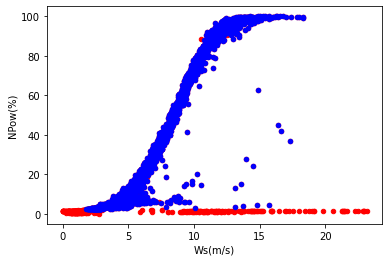

In [210]:
ax=df.plot(kind='scatter',x='Ws',y='NPow(%)',color='red')
df2.plot(ax=ax,kind='scatter',x='Ws',y='NPow(%)',color='blue')
ax.set_xlabel("Ws(m/s)")
ax.set_ylabel("NPow(%)")

plt.show()